In [3]:
# Impüorts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Intersection 
- Run the snakemake pipeline

# TODO
- Rerun the graph and pipeline (make it more linear) 
- Remove centromeres
- How to overlap: 
    1. How much is covered?
    2. How much is 1 to 1 covered?

In [4]:
# Intersection file 
f = "/tmp/global2/svorbrugg/1001GP/scripts/github/github_data/SV/intersection.10000000000.txt"

In [5]:
# Read with pandas
df = pd.read_csv(f, sep = "\t")

In [6]:
# Check this
df

,chrom,start,end,num,list,graph,annagram
0,10002_Chr1,1,2203,1,annagram,0,1
1,10002_Chr1,2203,2338,2,"graph,annagram",1,1
2,10002_Chr1,2338,2456,1,annagram,0,1
3,10002_Chr1,2456,3197,2,"graph,annagram",1,1
4,10002_Chr1,3197,3500,1,annagram,0,1
...,...,...,...,...,...,...,...
4218721,TAIR10_Chr5,26972635,26972645,1,annagram,0,1
4218722,TAIR10_Chr5,26973227,26973255,2,"graph,annagram",1,1
4218723,TAIR10_Chr5,26973255,26973256,1,annagram,0,1
4218724,TAIR10_Chr5,26974269,26974300,2,"graph,annagram",1,1


In [7]:
# Add two columns
df["acc"] = df["chrom"].apply(lambda x: x.split("_")[0])
df["length"] = df["end"] - df["start"]

In [8]:
df

,chrom,start,end,num,list,graph,annagram,acc,length
0,10002_Chr1,1,2203,1,annagram,0,1,10002,2202
1,10002_Chr1,2203,2338,2,"graph,annagram",1,1,10002,135
2,10002_Chr1,2338,2456,1,annagram,0,1,10002,118
3,10002_Chr1,2456,3197,2,"graph,annagram",1,1,10002,741
4,10002_Chr1,3197,3500,1,annagram,0,1,10002,303
...,...,...,...,...,...,...,...,...,...
4218721,TAIR10_Chr5,26972635,26972645,1,annagram,0,1,TAIR10,10
4218722,TAIR10_Chr5,26973227,26973255,2,"graph,annagram",1,1,TAIR10,28
4218723,TAIR10_Chr5,26973255,26973256,1,annagram,0,1,TAIR10,1
4218724,TAIR10_Chr5,26974269,26974300,2,"graph,annagram",1,1,TAIR10,31


In [9]:
def read_data(f): 
    df = pd.read_csv(f, sep = "\t")
    # Add two columns
    df["acc"] = df["chrom"].apply(lambda x: x.split("_")[0])
    df["length"] = df["end"] - df["start"]
    do = df.groupby("list").sum()["length"]/sum(df.groupby("list").sum()["length"])
    return do

In [10]:
pref = "/tmp/global2/svorbrugg/1001GP/scripts/github/github_data/SV/intersection."

In [11]:
data = []
for x in [10000000000,10000, 20000, 50000, 100000]: 
    xx = str(x)
    data.append(read_data(pref + xx + ".txt"))

In [12]:
data

[list
 annagram          0.003189
 graph             0.615319
 graph,annagram    0.381491
 Name: length, dtype: float64,
 list
 annagram          0.236660
 graph             0.329008
 graph,annagram    0.434333
 Name: length, dtype: float64,
 list
 annagram          0.147149
 graph             0.352676
 graph,annagram    0.500175
 Name: length, dtype: float64,
 list
 annagram          0.088619
 graph             0.379677
 graph,annagram    0.531703
 Name: length, dtype: float64,
 list
 annagram          0.067505
 graph             0.397695
 graph,annagram    0.534799
 Name: length, dtype: float64]

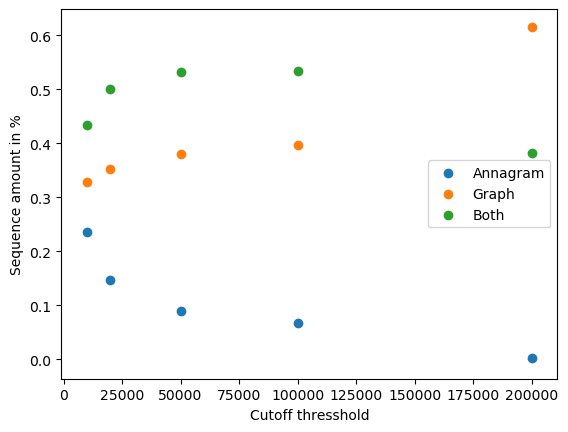

In [21]:
plt.rcdefaults() 
plt.scatter([200000,10000, 20000, 50000, 100000], [x["annagram"] for x in data], label = "Annagram")
plt.scatter([200000,10000, 20000, 50000, 100000], [x["graph"] for x in data], label = "Graph")
plt.scatter([200000,10000, 20000, 50000, 100000], [x["graph,annagram"] for x in data], label = "Both")
plt.ylabel("Sequence amount in %")
plt.xlabel("Cutoff thresshold")
plt.legend()
plt.savefig("plots/remove.bigbubble.png")
plt.savefig("plots/remove.bigbubble.svg")



In [14]:
plt.rcdefaults() 

In [15]:
data[0]

list
annagram          0.003189
graph             0.615319
graph,annagram    0.381491
Name: length, dtype: float64

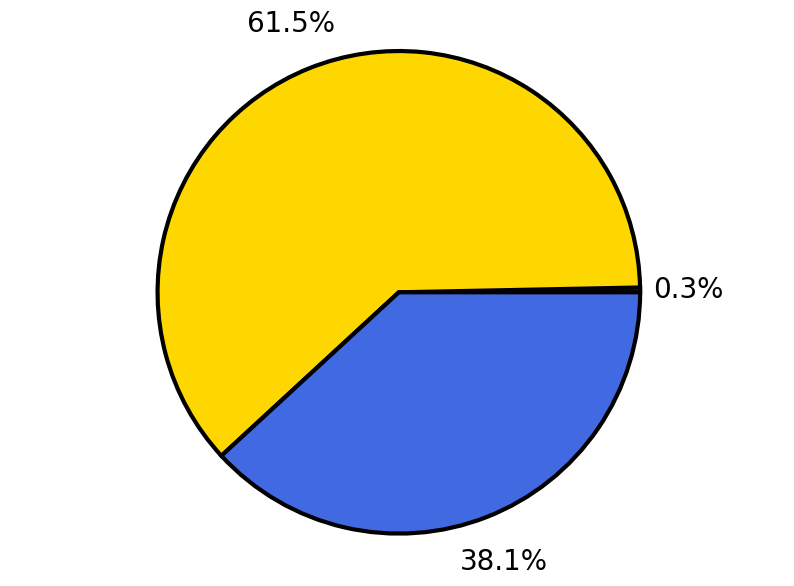

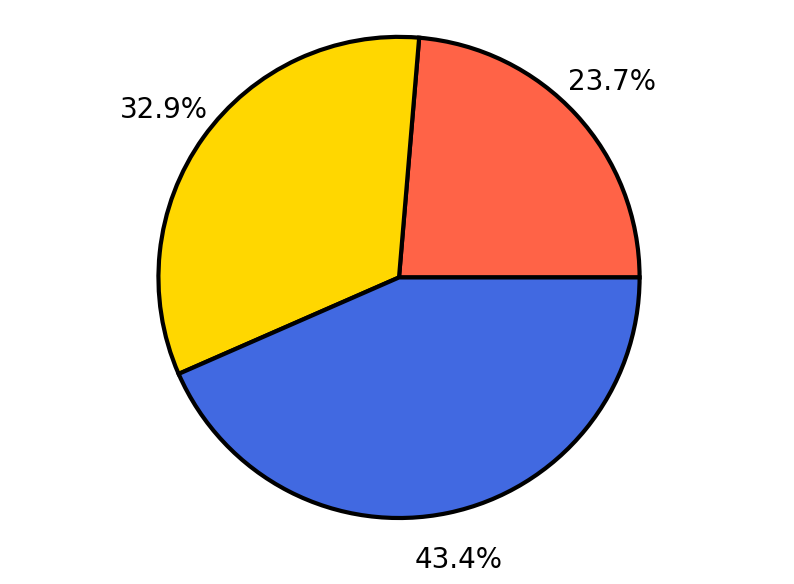

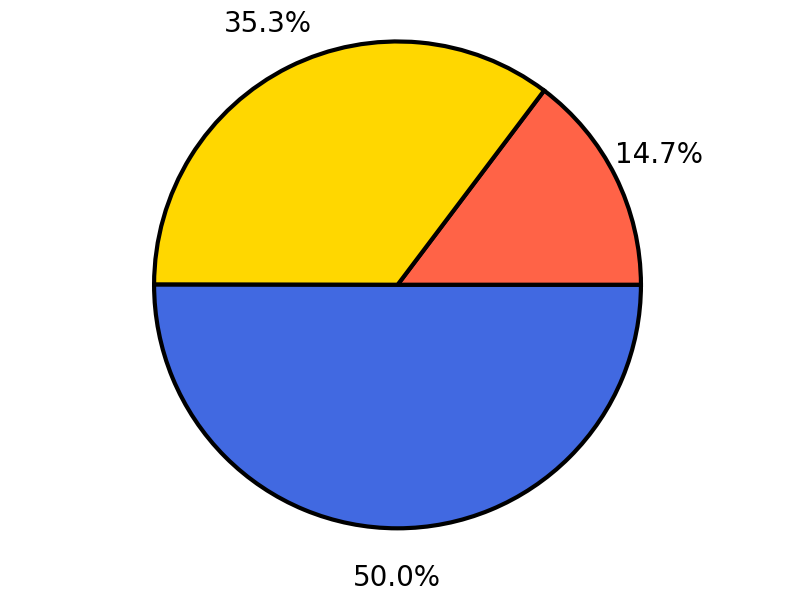

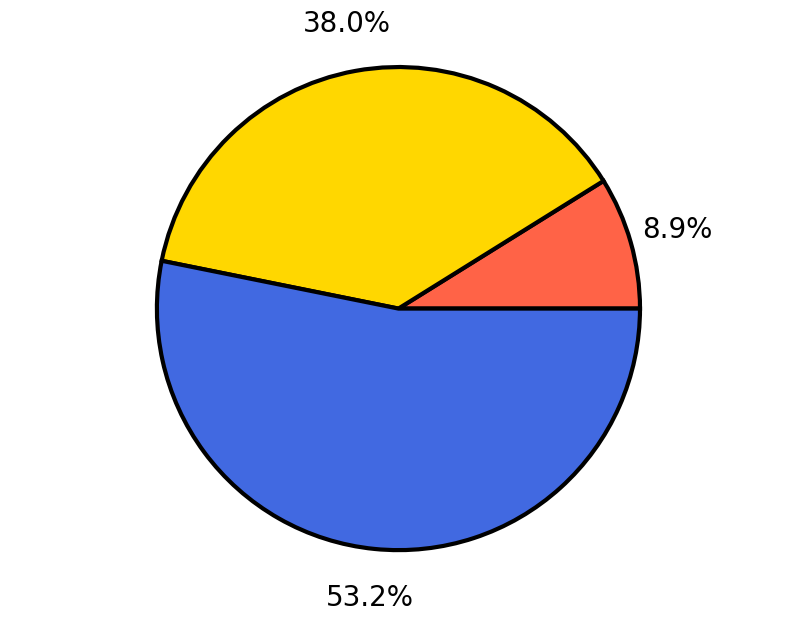

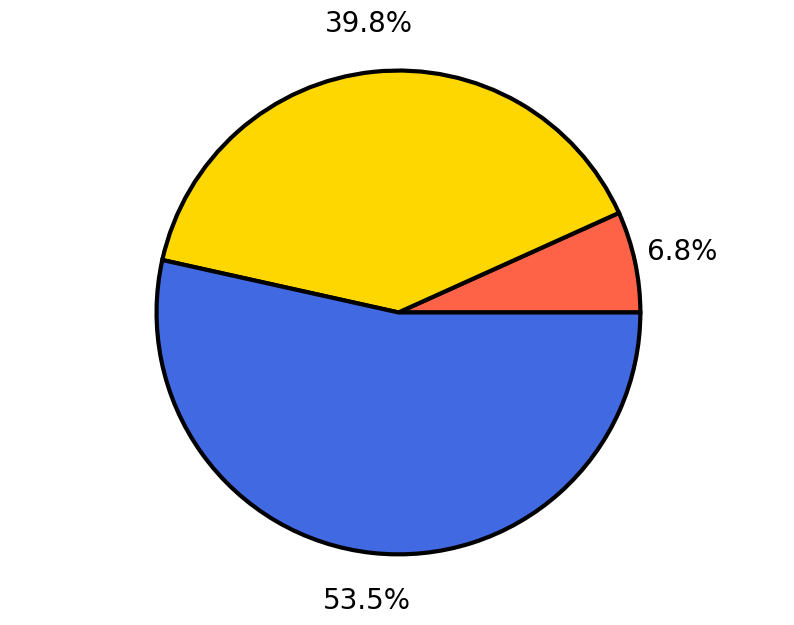

In [16]:
for i, x in enumerate(data):
    plt.figure(figsize=(10,7))
    plt.rcParams['font.size'] = 20
    labels = ['Soft', 'Private', 'Core']
    colors = ['tomato', 'gold', "royalblue"]
    plt.pie(x, colors=colors, autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 3, 'antialiased': True}, pctdistance=1.2)
    plt.axis('equal'); 
    plt.savefig("pie.overlap."+ str([0,10000, 20000, 50000, 100000][i]) + ".png", dpi = 1000)
    plt.show()
    #plt.title("Cake chart - 26 accessions - Sequence based - Graph")

# Analysis

In [17]:
# Take an example accession
df_1741 = df.loc[df["acc"] == "1741"]
df_1741

,chrom,start,end,num,list,graph,annagram,acc,length
451814,1741_Chr1,1,209,1,annagram,0,1,1741,208
451815,1741_Chr1,209,344,2,"graph,annagram",1,1,1741,135
451816,1741_Chr1,344,462,1,annagram,0,1,1741,118
451817,1741_Chr1,462,1208,2,"graph,annagram",1,1,1741,746
451818,1741_Chr1,1208,1511,1,annagram,0,1,1741,303
...,...,...,...,...,...,...,...,...,...
602821,1741_Chr5,27069567,27069577,1,annagram,0,1,1741,10
602822,1741_Chr5,27070159,27070187,2,"graph,annagram",1,1,1741,28
602823,1741_Chr5,27070187,27070188,1,annagram,0,1,1741,1
602824,1741_Chr5,27071201,27071232,2,"graph,annagram",1,1,1741,31


In [18]:
# Check the total amount
absolute = df_1741.groupby("list").sum()["length"]
absolute

list
annagram            164764
graph             34799711
graph,annagram    21884248
Name: length, dtype: int64

In [19]:
ratio = df_1741.groupby("list").sum()["length"]/sum(df_1741.groupby("list").sum()["length"])
ratio

list
annagram          0.002898
graph             0.612146
graph,annagram    0.384956
Name: length, dtype: float64

/ebio/abt6/svorbrugg/svorbrugg/tools/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


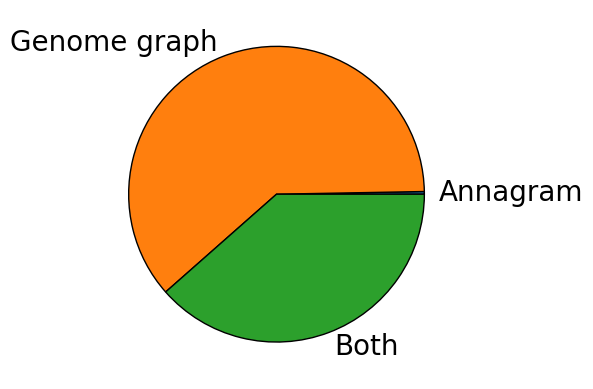

In [20]:
# This is a pie chart of the overlap
labels = ['Annagram', 'Genome graph', 'Both']
sizes = [df_1741.groupby("list").sum()["length"]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,         wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1});
#plt.savefig("piechart_overlap.before.png", dpi = 1000)

# Check whats wrong

In [198]:
# Intersection file 
f = "/tmp/global2/svorbrugg/1001GP/scripts/github/github_data/SV/intersection.50000.txt"

In [199]:
# Read with pandas
df = pd.read_csv(f, sep = "\t")

In [200]:
# Take a single chromosome of a specific accession
df1 = df.loc[df["chrom"] == "1741_Chr1"].loc[df["list"] == "graph"]


In [201]:
df1

,chrom,start,end,num,list,graph,annagram
517214,1741_Chr1,6667,6693,1,graph,1,0
517215,1741_Chr1,6735,8697,1,graph,1,0
517217,1741_Chr1,8735,8802,1,graph,1,0
517219,1741_Chr1,8836,9799,1,graph,1,0
517220,1741_Chr1,10915,10971,1,graph,1,0
...,...,...,...,...,...,...,...
560852,1741_Chr1,30094287,30094298,1,graph,1,0
560853,1741_Chr1,30094770,30094822,1,graph,1,0
560855,1741_Chr1,30095540,30095578,1,graph,1,0
560857,1741_Chr1,30095670,30095672,1,graph,1,0


In [202]:
import numpy as np

In [210]:
# Get a list of all positions which are only covered by the "graph"
graph = []
for k, x in df1.iterrows(): 
    graph.extend(list(range(x["start"], x["end"])))

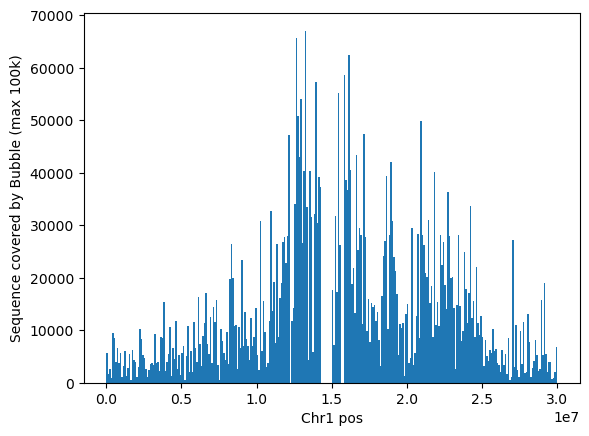

In [216]:
# Check on which position there are the most "graph sequences"
plt.hist(list(set(graph)), bins = np.linspace(0,30000000, 301));
plt.xlabel("Chr1 pos")
plt.ylabel("Sequence covered by Bubble (max 100k)")
plt.savefig("onlygraph.png")

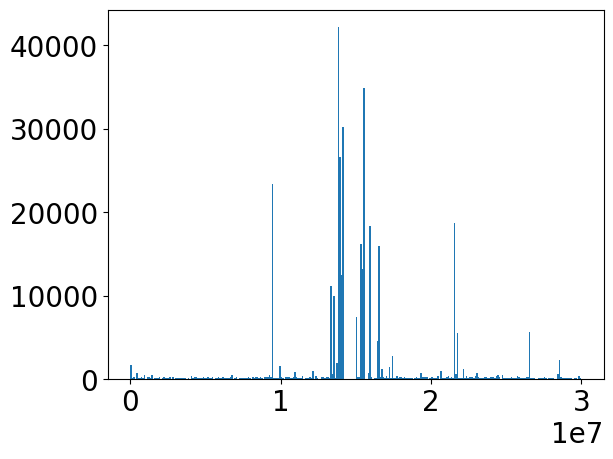

In [205]:
df1 = df.loc[df["chrom"] == "1741_Chr1"].loc[df["list"] == "annagram"]
# Get a list of all positions which are only covered by the "graph"
graph = []
for k, x in df1.iterrows(): 
    graph.extend(list(range(x["start"], x["end"])))
# Check on which position there are the most "graph sequences"
plt.hist(list(set(graph)), bins = np.linspace(0,30000000, 301));


In [206]:
df.loc[df["chrom"] == "1741_Chr1"].loc[df["list"] == "graph,annagram"]

,chrom,start,end,num,list,graph,annagram
517203,1741_Chr1,209,344,2,"graph,annagram",1,1
517205,1741_Chr1,462,1208,2,"graph,annagram",1,1
517207,1741_Chr1,1511,1531,2,"graph,annagram",1,1
517210,1741_Chr1,4212,4239,2,"graph,annagram",1,1
517212,1741_Chr1,6205,6229,2,"graph,annagram",1,1
...,...,...,...,...,...,...,...
560838,1741_Chr1,30082902,30082932,2,"graph,annagram",1,1
560842,1741_Chr1,30092377,30092392,2,"graph,annagram",1,1
560846,1741_Chr1,30092678,30092697,2,"graph,annagram",1,1
560851,1741_Chr1,30094226,30094287,2,"graph,annagram",1,1


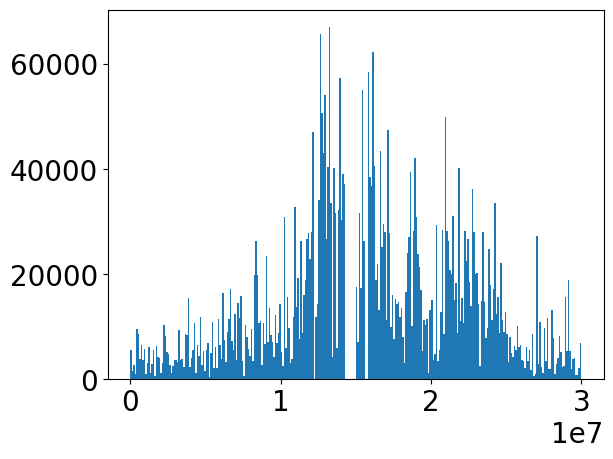

In [207]:
df1 = df.loc[df["chrom"] == "1741_Chr1"].loc[df["list"] == "graph,annagram"]
# Get a list of all positions which are only covered by the "graph"
graph = []
for k, x in df1.iterrows(): 
    graph.extend(list(range(x["start"], x["end"])))
# Check on which position there are the most "graph sequences"
plt.hist(list(set(graph)), bins = np.linspace(0,30000000, 301));

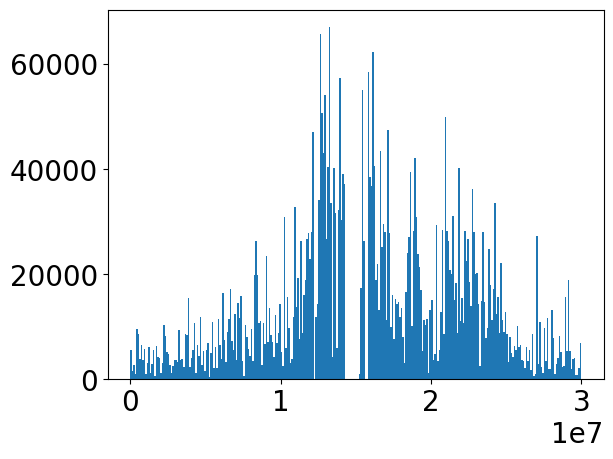

In [179]:
# Check on which position there are the most "graph sequences"
plt.hist(gset, bins = np.linspace(0,30000000, 301));

In [178]:
df_cen.loc["1741"]

cen.start.1    14287592
cen.start.2     2980598
cen.start.3    12717014
cen.start.4     2934383
cen.start.5    11783663
cen.end.1      15292143
cen.end.2       3740253
cen.end.3      14689735
cen.end.4       4215688
cen.end.5      12320841
Name: 1741, dtype: int64

In [111]:
ff = set(list(range(df_cen.loc["1741"]["cen.start.1"] , df_cen.loc["1741"]["cen.end.1"])))

In [96]:
ff

{14680064,
 14680065,
 14680066,
 14680067,
 14680068,
 14680069,
 14680070,
 14680071,
 14680072,
 14680073,
 14680074,
 14680075,
 14680076,
 14680077,
 14680078,
 14680079,
 14680080,
 14680081,
 14680082,
 14680083,
 14680084,
 14680085,
 14680086,
 14680087,
 14680088,
 14680089,
 14680090,
 14680091,
 14680092,
 14680093,
 14680094,
 14680095,
 14680096,
 14680097,
 14680098,
 14680099,
 14680100,
 14680101,
 14680102,
 14680103,
 14680104,
 14680105,
 14680106,
 14680107,
 14680108,
 14680109,
 14680110,
 14680111,
 14680112,
 14680113,
 14680114,
 14680115,
 14680116,
 14680117,
 14680118,
 14680119,
 14680120,
 14680121,
 14680122,
 14680123,
 14680124,
 14680125,
 14680126,
 14680127,
 14680128,
 14680129,
 14680130,
 14680131,
 14680132,
 14680133,
 14680134,
 14680135,
 14680136,
 14680137,
 14680138,
 14680139,
 14680140,
 14680141,
 14680142,
 14680143,
 14680144,
 14680145,
 14680146,
 14680147,
 14680148,
 14680149,
 14680150,
 14680151,
 14680152,
 14680153,
 14680154,

In [147]:
len(gset)

4047306

In [146]:
gset = list(set(graph) - set(ff))

In [144]:
data = []
df_cen = pd.read_csv("/tmp/global2/svorbrugg/1001GP/scripts/github/raw_data/centromere/centromeres.txt", sep = "\t")
        

In [145]:
len(graph)

4102758

In [88]:
len(ff)

1004551

In [89]:
df1.to_csv("only_graph.bed", sep = "\t", index = False)